Name: Aditya Gujar <br>
Reg no: 2448505 <br>
Subject: Speech Processing and Recognition <br>
CIA-1

# Lab Task

### Part-A

Question-1

In [228]:
import librosa

In [229]:
audio_file = 'audio_files/exam-1.wav'
y, sr = librosa.load(audio_file)

print(f"Sample rate: {sr} Hz")
print(f"Duration: {len(y)/sr:.2f} seconds")
print(f"Number of samples: {len(y)}")

Sample rate: 22050 Hz
Duration: 27.99 seconds
Number of samples: 617238


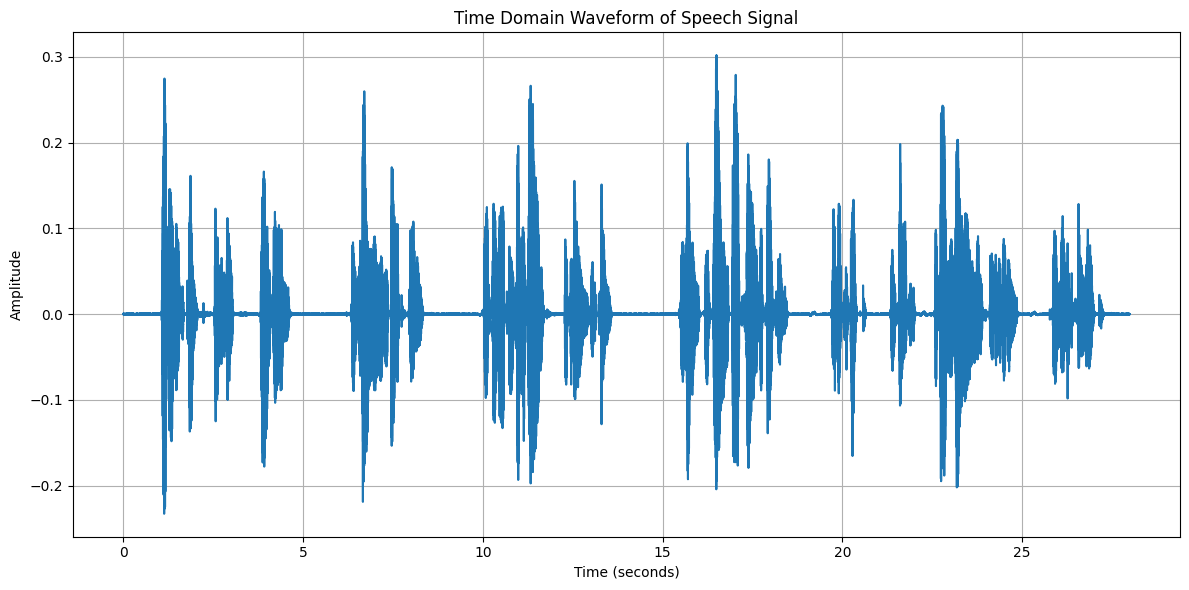

In [230]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the time domain waveform
plt.figure(figsize=(12, 6))
time = np.linspace(0, len(y)/sr, len(y))
plt.plot(time, y)
plt.title('Time Domain Waveform of Speech Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Compute frequency spectrum using FFT
fft = np.fft.fft(y)
magnitude = np.abs(fft)
phase = np.angle(fft)

# Create frequency axis
frequencies = np.fft.fftfreq(len(y), 1/sr)

# Take only positive frequencies (first half)
positive_freq_idx = frequencies >= 0
freq_positive = frequencies[positive_freq_idx]
magnitude_positive = magnitude[positive_freq_idx]

print(f"Frequency range: 0 to {freq_positive[-1]:.2f} Hz")
print(f"Frequency resolution: {freq_positive[1]:.2f} Hz")


Frequency spectrum computed successfully!
Frequency range: 0 to 11024.96 Hz
Frequency resolution: 0.04 Hz


In [232]:
# Identify maximum frequency components
# Find the top 10 frequency components with highest magnitude
top_indices = np.argsort(magnitude_positive)[-10:][::-1]
top_frequencies = freq_positive[top_indices]
top_magnitudes = magnitude_positive[top_indices]

print("Top 10 frequency components with highest magnitude:")
print("Rank | Frequency (Hz) | Magnitude")
print("-" * 40)
for i, (freq, mag) in enumerate(zip(top_frequencies, top_magnitudes)):
    print(f"{i+1:4d} | {freq:13.2f} | {mag:10.2f}")

# Find the absolute maximum frequency component
max_idx = np.argmax(magnitude_positive)
max_freq = freq_positive[max_idx]
max_magnitude = magnitude_positive[max_idx]

print(f"\nMaximum frequency component:")
print(f"Frequency: {max_freq:.2f} Hz")
print(f"Magnitude: {max_magnitude:.2f}")


Top 10 frequency components with highest magnitude:
Rank | Frequency (Hz) | Magnitude
----------------------------------------
   1 |        126.64 |     533.80
   2 |        115.24 |     528.26
   3 |        126.46 |     518.49
   4 |        125.85 |     513.09
   5 |        123.25 |     506.32
   6 |        122.17 |     503.60
   7 |        121.46 |     491.21
   8 |        116.35 |     488.98
   9 |        123.43 |     478.76
  10 |        126.00 |     474.34

Maximum frequency component:
Frequency: 126.64 Hz
Magnitude: 533.80


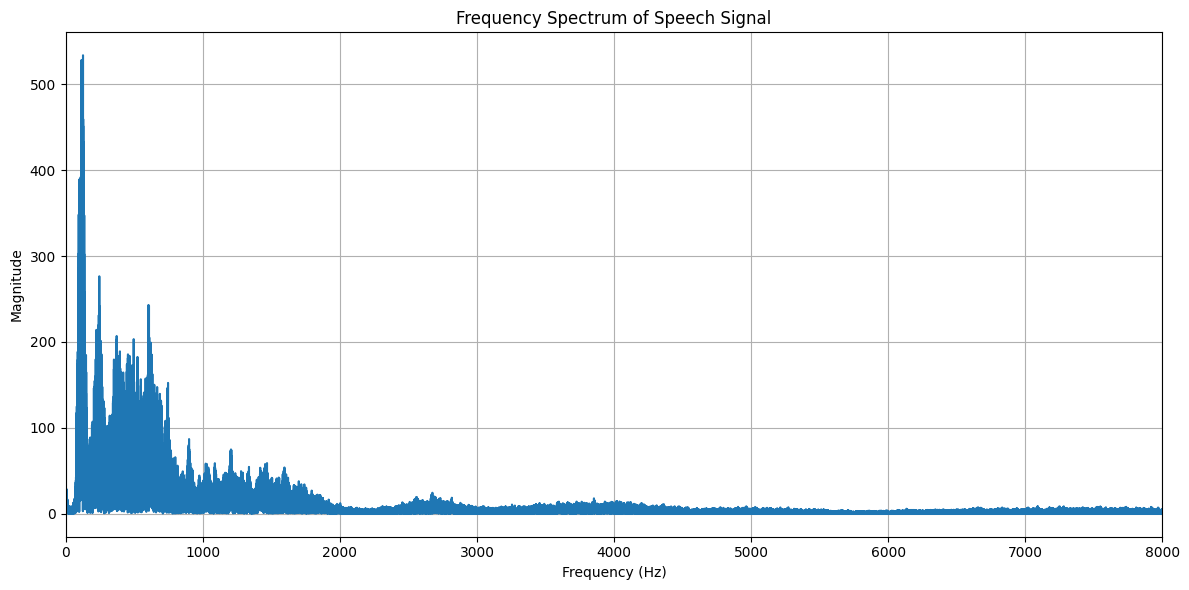

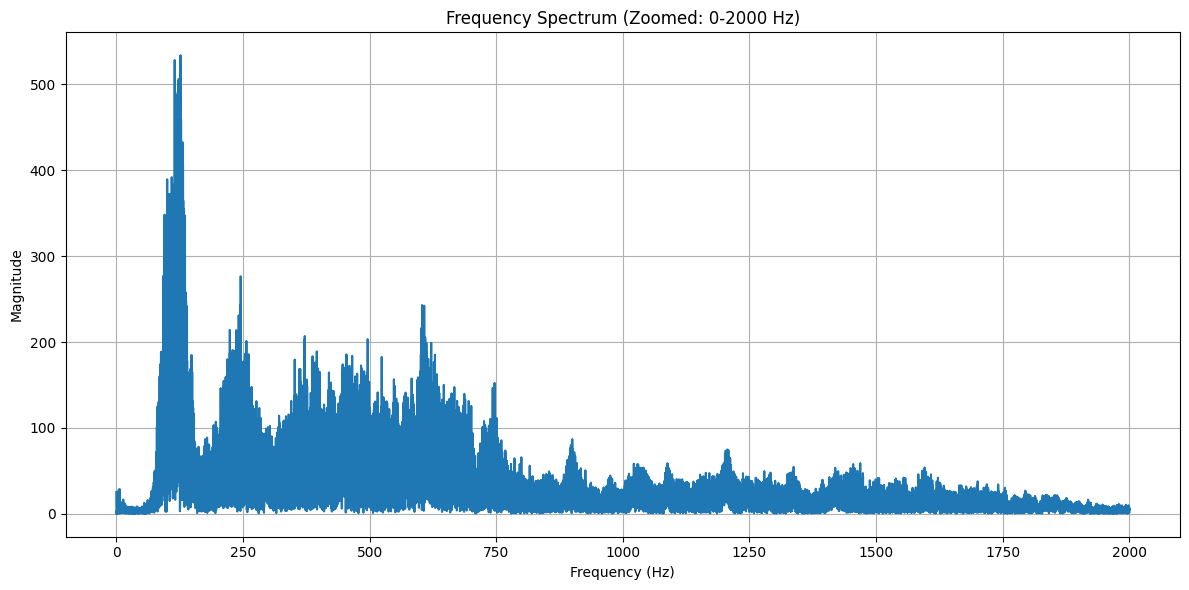

In [233]:
# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freq_positive, magnitude_positive)
plt.title('Frequency Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 8000)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
zoom_idx = freq_positive <= 2000
plt.plot(freq_positive[zoom_idx], magnitude_positive[zoom_idx])
plt.title('Frequency Spectrum (Zoomed: 0-2000 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

Question-2

In [234]:
max_freq = np.max(freq_positive[magnitude_positive > 0.01 * np.max(magnitude_positive)])

# Apply Nyquist theorem
min_sampling_rate = 2 * max_freq

print(f"Maximum frequency in signal: {max_freq:.1f} Hz")
print(f"Minimum sampling rate needed: {min_sampling_rate:.1f} Hz")
print(f"Current sampling rate: {sr} Hz")

if sr >= min_sampling_rate:
    print("Sampling rate is adequate - no aliasing")
else:
    print("Sampling rate is too low - aliasing will occur")


Maximum frequency in signal: 8600.6 Hz
Minimum sampling rate needed: 17201.2 Hz
Current sampling rate: 22050 Hz
Sampling rate is adequate - no aliasing


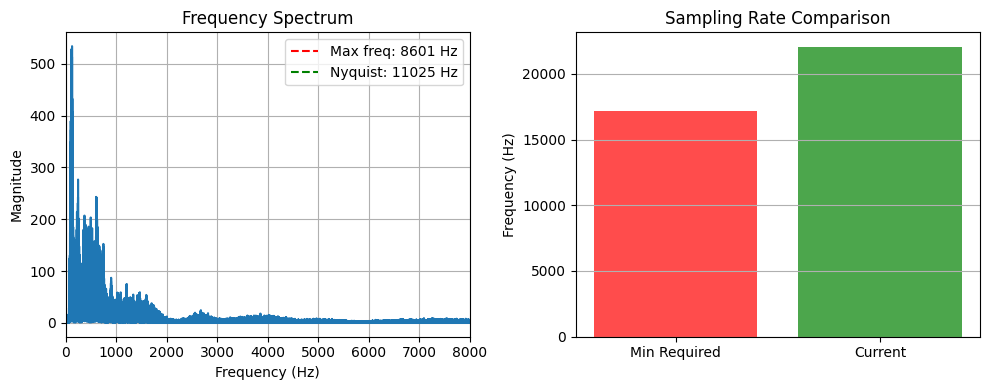

In [235]:
# Simple visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(freq_positive, magnitude_positive)
plt.axvline(x=max_freq, color='red', linestyle='--', label=f'Max freq: {max_freq:.0f} Hz')
plt.axvline(x=sr/2, color='green', linestyle='--', label=f'Nyquist: {sr/2:.0f} Hz')
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.xlim(0, 8000)

plt.subplot(1, 2, 2)
rates = [min_sampling_rate, sr]
labels = ['Min Required', 'Current']
colors = ['red', 'green']
plt.bar(labels, rates, color=colors, alpha=0.7)
plt.title('Sampling Rate Comparison')
plt.ylabel('Frequency (Hz)')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


Question-3

In [236]:
print("Part A - Question 3: Sampling Rate Comparison")
print("-" * 50)

from scipy import signal

test_rates = [8000, 16000, 44100]
print(f"Testing rates: {test_rates} Hz")

Part A - Question 3: Sampling Rate Comparison
--------------------------------------------------
Testing rates: [8000, 16000, 44100] Hz


In [237]:
# Create reconstructed signals at different rates
reconstructed_signals = {}

for rate in test_rates:
    target_length = int(len(y) * rate / sr)
    downsampled = signal.resample(y, target_length)
    reconstructed = signal.resample(downsampled, len(y))
    reconstructed_signals[rate] = reconstructed
    print(f"{rate} Hz: {len(downsampled)} samples -> reconstructed")


8000 Hz: 223941 samples -> reconstructed
16000 Hz: 447882 samples -> reconstructed
44100 Hz: 1234476 samples -> reconstructed


In [238]:
# Calculate error measures
print("\nError Analysis:")
print("Rate(Hz)  MSE")
print("-" * 20)

for rate in test_rates:
    reconstructed = reconstructed_signals[rate]
    
    # Calculate MSE and SNR
    mse = np.mean((y - reconstructed)**2)
    
    print(f"{rate:8}  {mse:.6f}")



Error Analysis:
Rate(Hz)  MSE
--------------------
    8000  0.000005
   16000  0.000001
   44100  0.000000


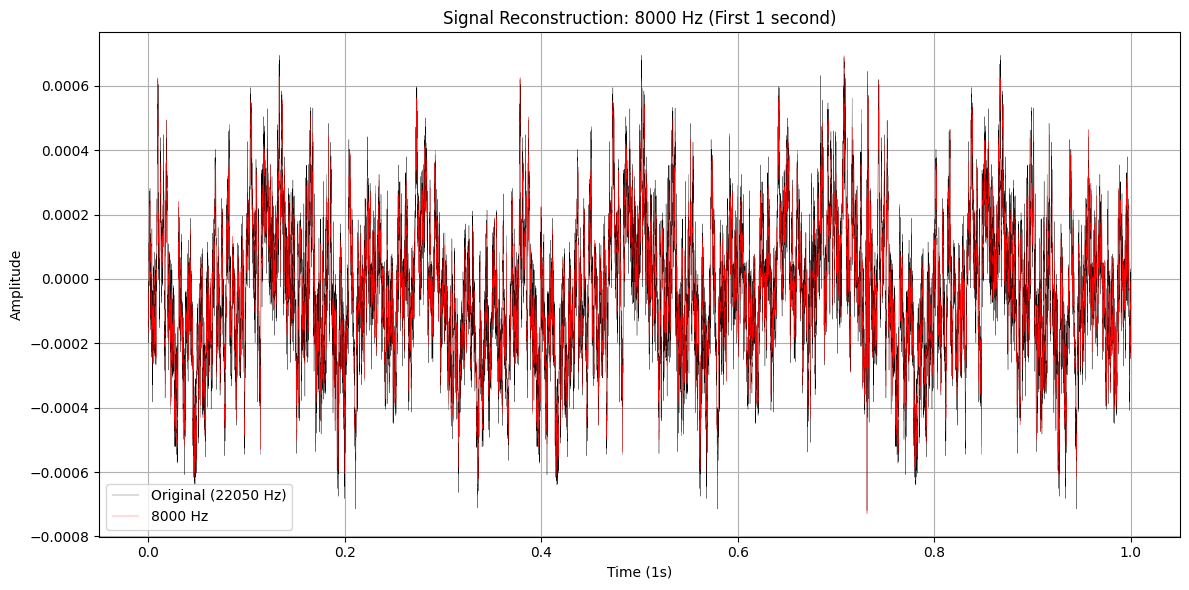

In [239]:
plt.figure(figsize=(12, 6))
time_1sec = int(sr)  # First 1 second
time_axis = np.linspace(0, 1, time_1sec)

plt.plot(time_axis, y[:time_1sec], 'k-', linewidth=0.20, label='Original (22050 Hz)')
plt.plot(time_axis, reconstructed_signals[8000][:time_1sec], 'r-', linewidth=0.20, label='8000 Hz')

plt.title('Signal Reconstruction: 8000 Hz (First 1 second)')
plt.xlabel('Time (1s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


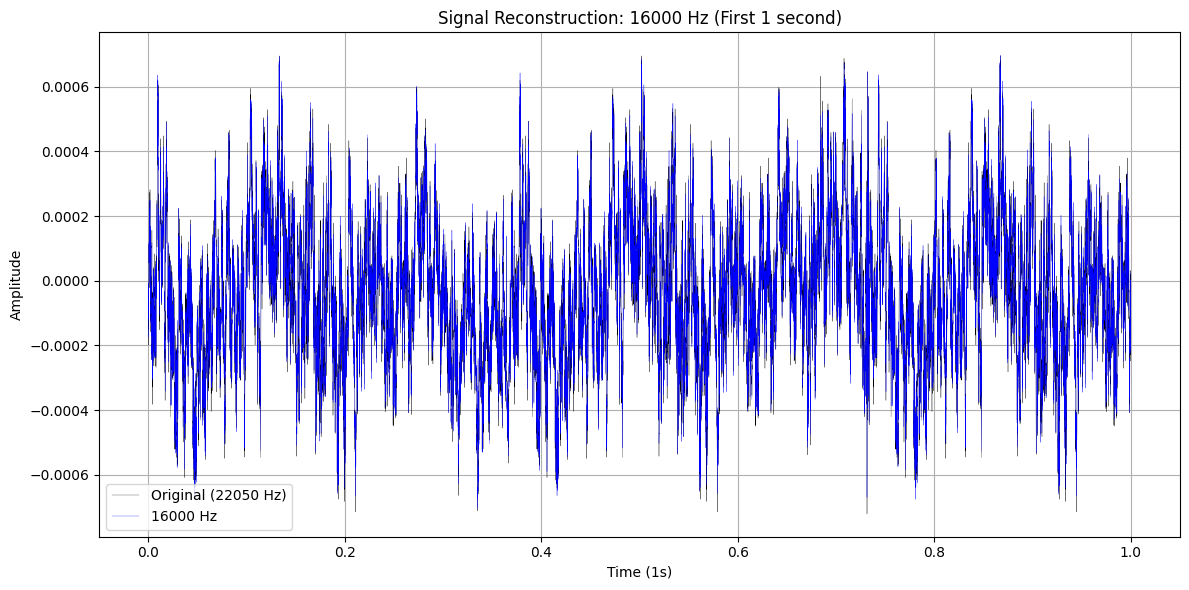

In [240]:
plt.figure(figsize=(12, 6))
time_1sec = int(sr)  # First 1 second
time_axis = np.linspace(0, 1, time_1sec)

plt.plot(time_axis, y[:time_1sec], 'k-', linewidth=0.20, label='Original (22050 Hz)')
plt.plot(time_axis, reconstructed_signals[16000][:time_1sec], 'b-', linewidth=0.20, label='16000 Hz')

plt.title('Signal Reconstruction: 16000 Hz (First 1 second)')
plt.xlabel('Time (1s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


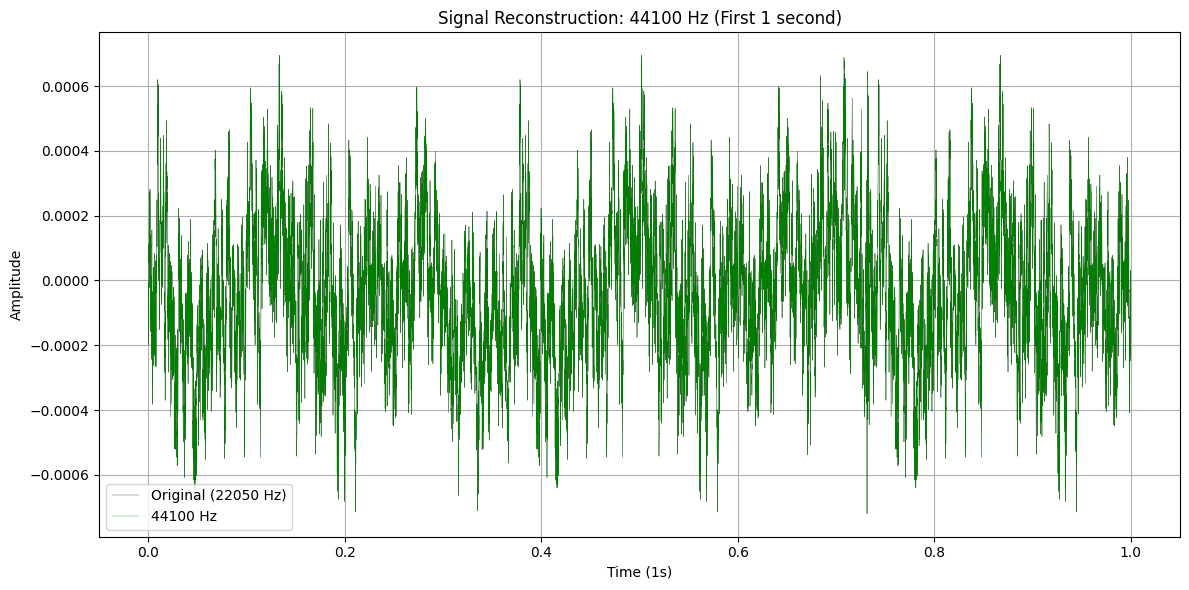

In [241]:
plt.figure(figsize=(12, 6))
time_1sec = int(sr)  # First 1 second
time_axis = np.linspace(0, 1, time_1sec)

plt.plot(time_axis, y[:time_1sec], 'k-', linewidth=0.20, label='Original (22050 Hz)')
plt.plot(time_axis, reconstructed_signals[44100][:time_1sec], 'g-', linewidth=0.20, label='44100 Hz')

plt.title('Signal Reconstruction: 44100 Hz (First 1 second)')
plt.xlabel('Time (1s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


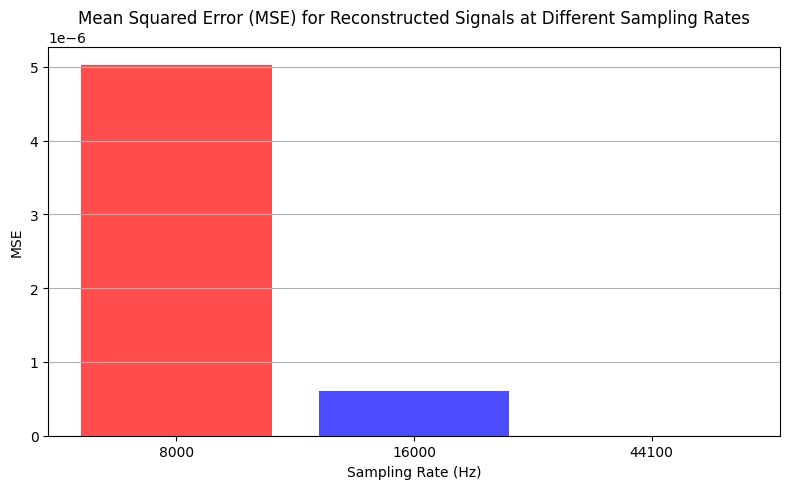

In [242]:
mse_values = []
for rate in test_rates:
    reconstructed = reconstructed_signals[rate]
    mse = np.mean((y - reconstructed)**2)
    mse_values.append(mse)

# Plot the bar chart for MSE
plt.figure(figsize=(8, 5))
plt.bar([str(r) for r in test_rates], mse_values, color=['red', 'blue', 'green'], alpha=0.7)
plt.title('Mean Squared Error (MSE) for Reconstructed Signals at Different Sampling Rates')
plt.xlabel('Sampling Rate (Hz)')
plt.ylabel('MSE')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Part-B

Question-4

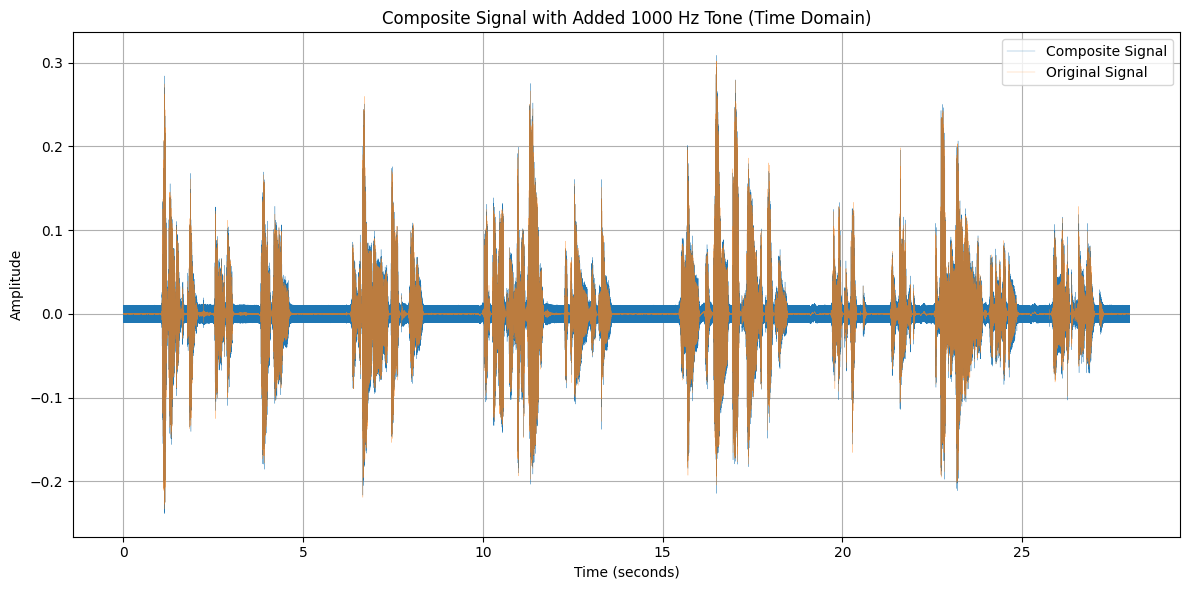

Top frequency components in composite signal with additional tone:
Rank | Frequency (Hz) | Magnitude
----------------------------------------
   1 |       1000.01 |    2654.87
   2 |        999.98 |    1162.08
   3 |       1000.05 |     622.67
   4 |        126.64 |     533.75
   5 |        115.24 |     528.22
   6 |        126.46 |     518.44
   7 |        125.85 |     513.07
   8 |        123.25 |     506.32
   9 |        122.17 |     503.55
  10 |        121.46 |     491.16
  11 |        116.35 |     488.99
  12 |        123.43 |     478.81
  13 |        126.00 |     474.31
  14 |        126.50 |     460.33
  15 |        127.82 |     459.53


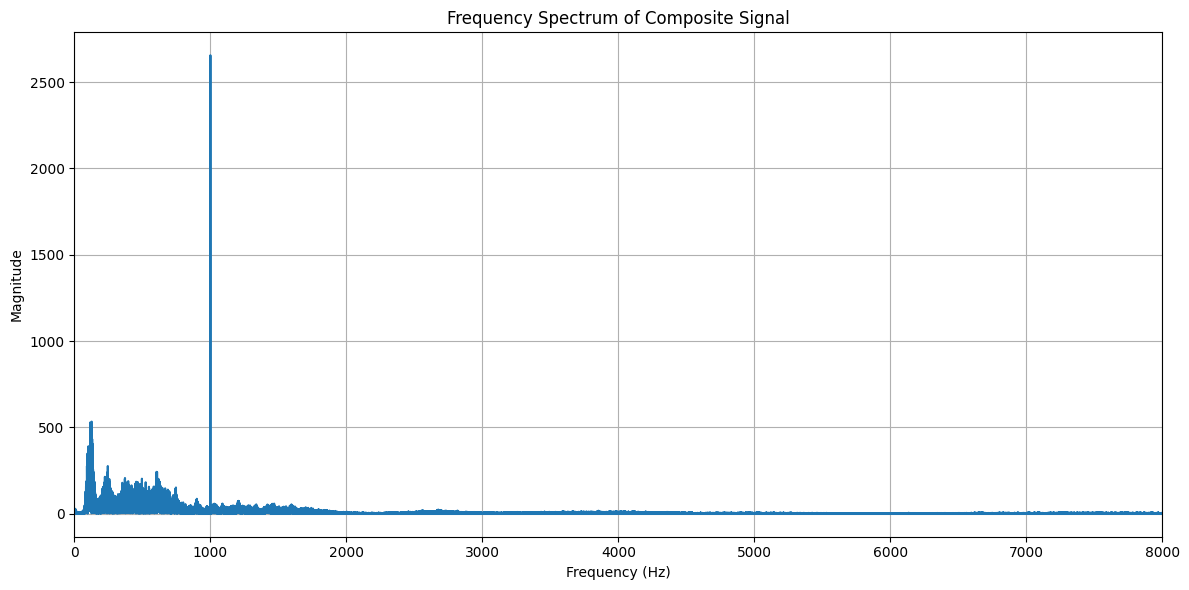

In [243]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the additional tone
tone_freq = 1000        # Frequency of the added tone in Hz
tone_amplitude = 0.010  # Lower amplitude to avoid box shape

# Generate time axis for the original signal
time = np.linspace(0, len(y)/sr, len(y))

# Generate the additional tone (sine wave)
additional_tone = tone_amplitude * np.sin(2 * np.pi * tone_freq * time)

# Create composite signal by adding the tone to the original
composite_signal = y + additional_tone

# Plot the composite signal (time domain)
plt.figure(figsize=(12, 6))
plt.plot(time, composite_signal, label='Composite Signal', linewidth=0.20)
plt.plot(time, y, alpha=0.7, label='Original Signal', linewidth=0.20)  # Also show original for comparison
plt.title('Composite Signal with Added 1000 Hz Tone (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute frequency spectrum of composite signal using FFT
fft_composite = np.fft.fft(composite_signal)
magnitude_composite = np.abs(fft_composite)
frequencies_composite = np.fft.fftfreq(len(composite_signal), 1/sr)

# Take only positive frequencies
positive_freq_idx_composite = frequencies_composite >= 0
freq_positive_composite = frequencies_composite[positive_freq_idx_composite]
magnitude_positive_composite = magnitude_composite[positive_freq_idx_composite]

# Identify top frequency components in composite signal
top_indices_composite = np.argsort(magnitude_positive_composite)[-15:][::-1]
top_frequencies_composite = freq_positive_composite[top_indices_composite]
top_magnitudes_composite = magnitude_positive_composite[top_indices_composite]

print("Top frequency components in composite signal with additional tone:")
print("Rank | Frequency (Hz) | Magnitude")
print("-" * 40)
for i, (freq, mag) in enumerate(zip(top_frequencies_composite, top_magnitudes_composite)):
    print(f"{i+1:4d} | {freq:13.2f} | {mag:10.2f}")

# Plot the frequency spectrum of composite signal
plt.figure(figsize=(12, 6))
plt.plot(freq_positive_composite, magnitude_positive_composite)
plt.title('Frequency Spectrum of Composite Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 8000)
plt.tight_layout()
plt.show()


Question-5

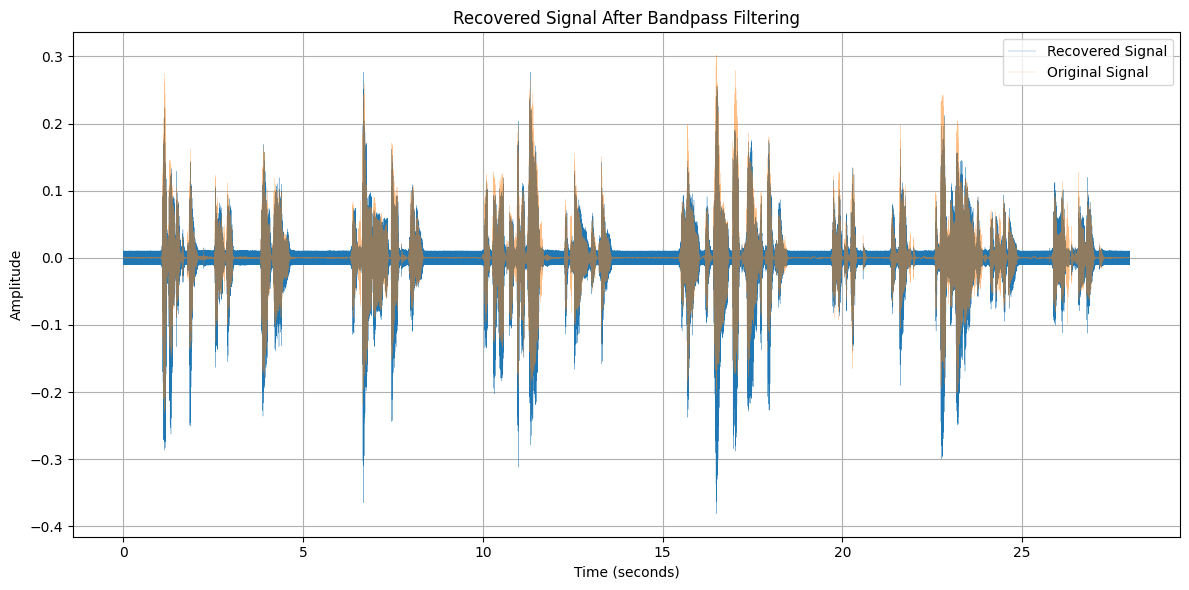

Recovery Quality Metrics:
MSE: 0.001191


In [ ]:
import librosa.effects

# Parameters
low_cut = 80
high_cut = 3000

from scipy.signal import butter, sosfilt

def bandpass_filter(signal, sr, lowcut, highcut):
    sos = butter(10, [lowcut, highcut], btype='band', fs=sr, output='sos')
    filtered = sosfilt(sos, signal)
    return filtered

recovered_signal = bandpass_filter(composite_signal, sr, low_cut, high_cut)

# Plot recovered signal
plt.figure(figsize=(12, 6))
plt.plot(time, recovered_signal, label='Recovered Signal', linewidth = 0.20)
plt.plot(time, y, alpha=0.5, label='Original Signal', linewidth = 0.20)
plt.title('Recovered Signal After Bandpass Filtering')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate quality of recovered signal
mse_recovery = np.mean((y - recovered_signal)**2)

print(f"Recovery Quality Metrics:")
print(f"MSE: {mse_recovery:.6f}")

Question-6

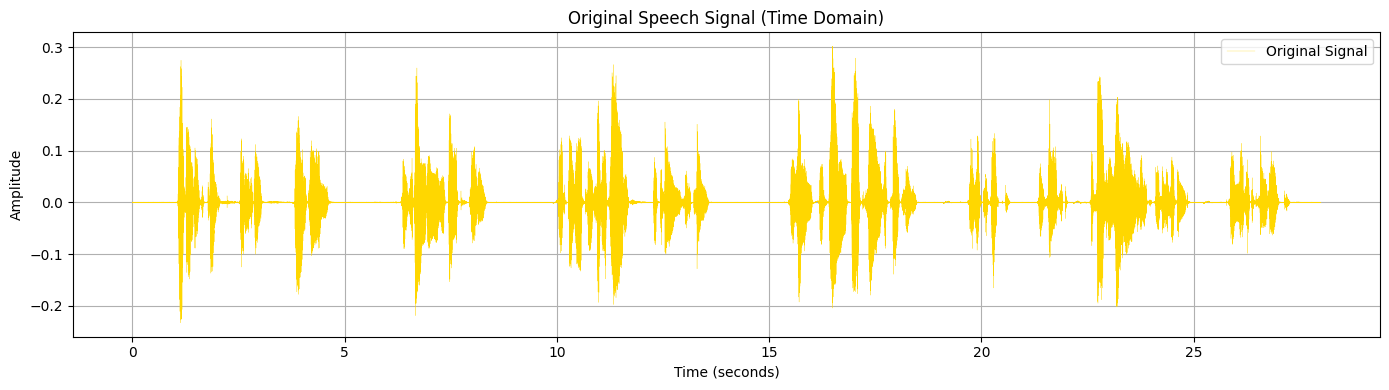

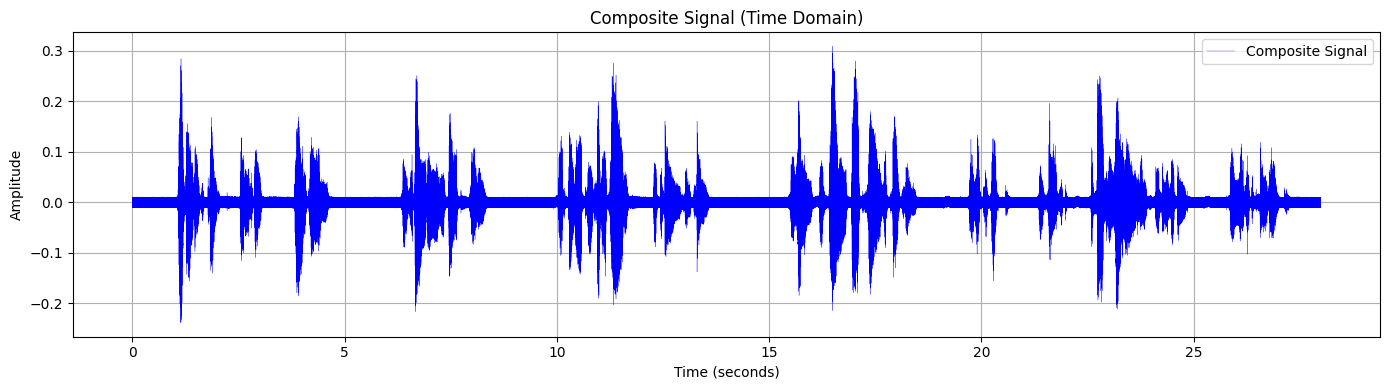

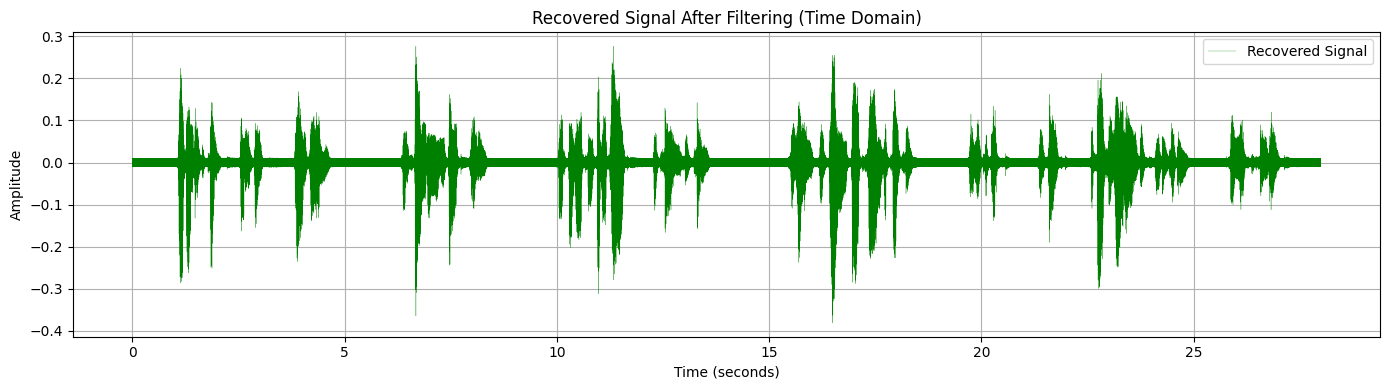

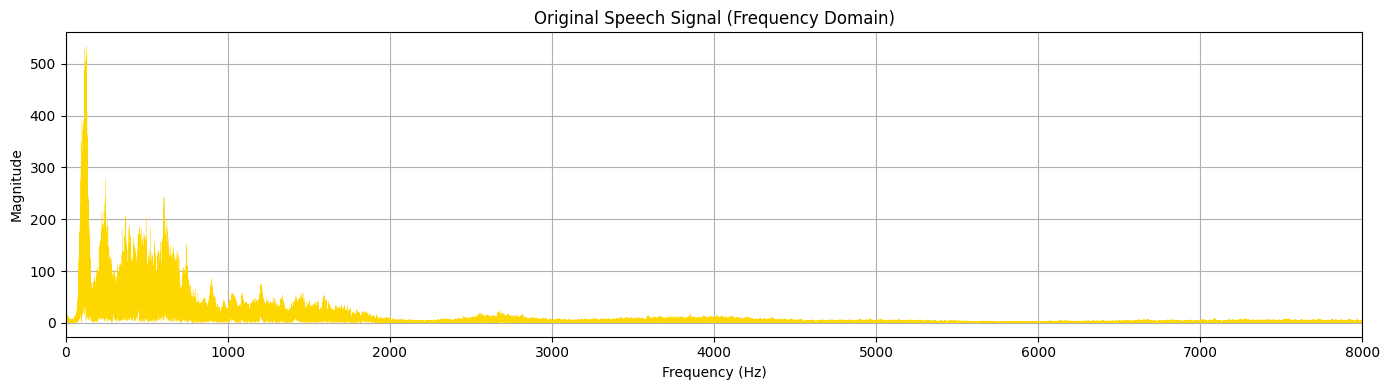

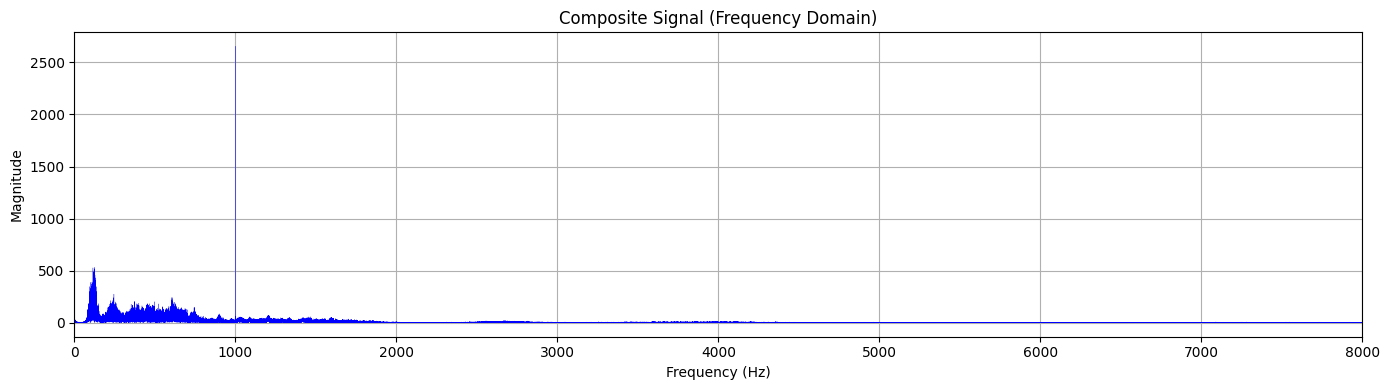

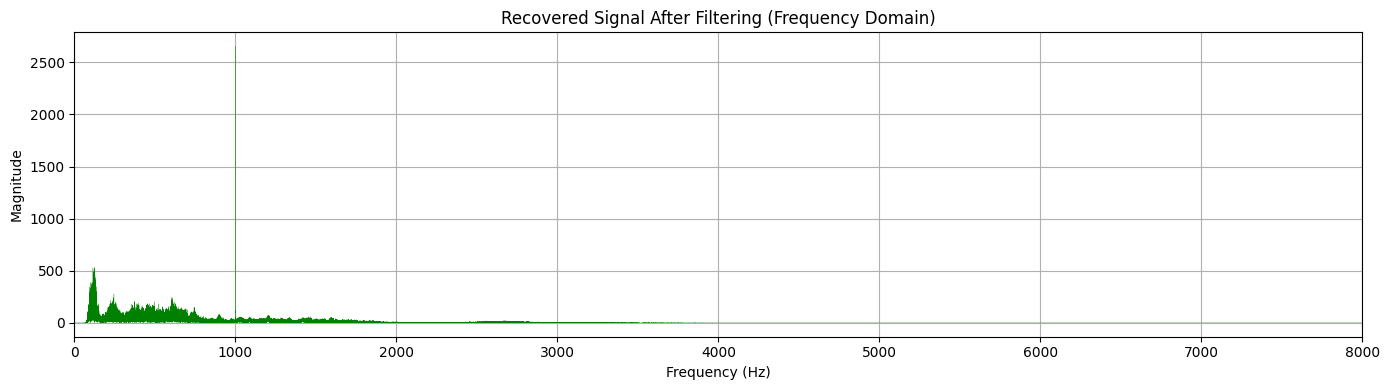

In [245]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))
plt.plot(time, y, color='gold', label='Original Signal', linewidth = 0.20)
plt.title('Original Speech Signal (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(time, composite_signal, color='blue', label='Composite Signal', linewidth = 0.20)
plt.title('Composite Signal (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(time, recovered_signal, color='green', label='Recovered Signal', linewidth = 0.20)
plt.title('Recovered Signal After Filtering (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Helper function for FFT plotting
def plot_frequency(signal, sr, title, color):
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequencies = np.fft.fftfreq(len(signal), 1/sr)
    pos_idx = frequencies >= 0
    plt.figure(figsize=(14, 4))
    plt.plot(frequencies[pos_idx], magnitude[pos_idx], color=color, linewidth = 0.20)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(0, 8000)
    plt.tight_layout()
    plt.show()

plot_frequency(y, sr, 'Original Speech Signal (Frequency Domain)', 'gold')
plot_frequency(composite_signal, sr, 'Composite Signal (Frequency Domain)', 'blue')
plot_frequency(recovered_signal, sr, 'Recovered Signal After Filtering (Frequency Domain)', 'green')